# 0 - Project kick off

### **Goals:**

1. Show that you can define application and business requirements (Data Architecture competency)
  - Clear list of initial requirements
2. Show how you have identified an interesting project that has the ability to cover many modules of the course. You have in mind a number of ways to increase complexity to meet more challenging learning objectives and you have in mind some way of obtaining or generating useful data.

**Ask**
- [ ] What is meant by 'business requirements'? We have app requirements but no business

## 1: Define application & business requirements

### **Application: Portfolio optimization tool**

- A new investor doesn't know how much to invest for a set of companies, but has researched companies they like
- the tool outputs how much of each company this person should buy depending on their risk tolerance
- outputs expected return, some other things as well that we might need 

#### Requirements

- The application should take in a list of companies and a risk tolerance, and output an EF (efficient frontier, see below) with a measure of it's statistical accuracy.
- This requires some kind of UI - a GUI or a CLI. In either case it should be simple, intuitive, and have sufficient documentation.
- The backend will require a mix of SQL databases and (likely) python elements to calculate more complex attributes such as the EF. It will also require stock data.

### **ERD (Database sketch)**

1. Many to many R--I
2. One to many/Many to one R-->I / R<--I
3. One to one R<-->I

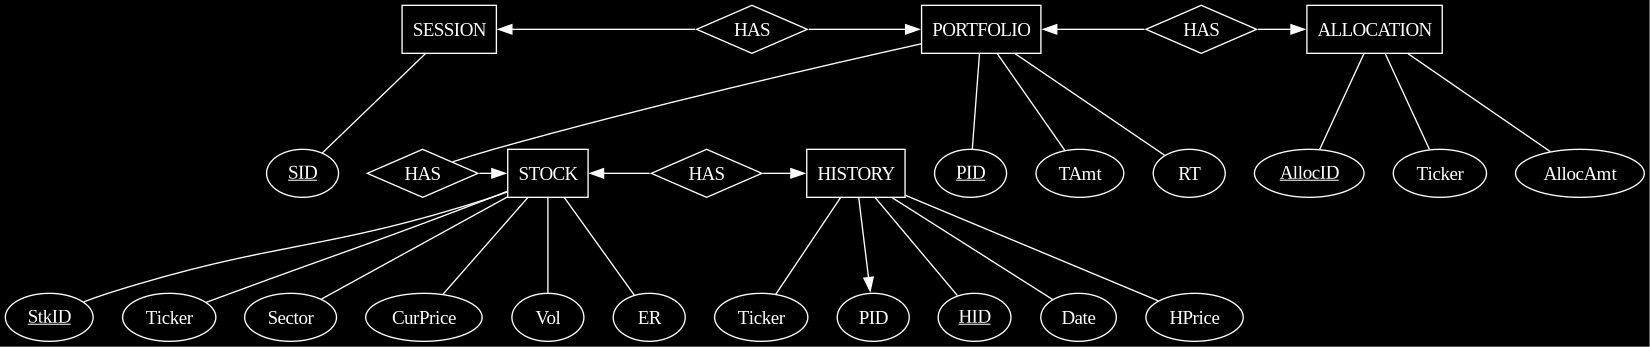

In [253]:
# Create ERD

from graphviz import Digraph

# Create a new directed graph
dot1 = Digraph(comment='ERD2')

# Set graph attributes for a black background and white nodes and edges
dot1.attr(bgcolor='black')
dot1.attr('node', color='white', fontcolor='white', style='filled', fillcolor='black')
dot1.attr('edge', color='white')
dot1.attr('graph', ranksep='1', nodesep='0.3')  # Reduced nodesep

# Add main entity nodes with shortened names
dot1.node('SSN', 'SESSION', shape='rectangle')
dot1.node('S', 'STOCK', shape='rectangle')
dot1.node('P', 'PORTFOLIO', shape='rectangle')
dot1.node('A', 'ALLOCATION', shape='rectangle')
dot1.node('H', 'HISTORY', shape='rectangle')

# Add relationship nodes
dot1.node('H1', 'HAS', shape='diamond')
dot1.node('H2', 'HAS', shape='diamond')
dot1.node('H3', 'HAS', shape='diamond')
dot1.node('H4', 'HAS', shape='diamond')

# Add subgraph for organizing nodes horizontally
with dot1.subgraph() as s:
    s.attr(rank='same')
    s.node('SSN')
    s.node('P')
    s.node('A')
    s.node('H1')
    s.node('H3')

with dot1.subgraph() as s2:
    s2.attr(rank='same')
    s2.node('S')
    s2.node('H')
    s2.node('H2')
    s2.node('H4')

# Add relationship edges
dot1.edge('SSN', 'H1', dir='back')
dot1.edge('H1', 'P')

dot1.edge('P', 'H2', arrowhead='none')
dot1.edge('H2', 'S')

dot1.edge('P', 'H3', dir='back')
dot1.edge('H3', 'A')

dot1.edge('S', 'H4', dir='back')
dot1.edge('H4', 'H')

# Add attribute edges (separate nodes for each attribute)
# Session
dot1.node('SID', '<<u>SID</u>>', shape='ellipse')
dot1.edge('SSN', 'SID', arrowhead='none')

# Stock
dot1.node('StkID', '<<u>StkID</u>>', shape='ellipse')
dot1.node('Ticker', 'Ticker', shape='ellipse')
dot1.node('Sector', 'Sector', shape='ellipse')
dot1.node('CurP', 'CurPrice', shape='ellipse')  # CurrentPrice
dot1.node('Vol', 'Vol', shape='ellipse')  # Volatility
dot1.node('ER', 'ER', shape='ellipse')  # ExpectedReturn
dot1.edge('S', 'StkID', arrowhead='none')
dot1.edge('S', 'Ticker', arrowhead='none')
dot1.edge('S', 'Sector', arrowhead='none')
dot1.edge('S', 'CurP', arrowhead='none')
dot1.edge('S', 'Vol', arrowhead='none')
dot1.edge('S', 'ER', arrowhead='none')

# Portfolio
dot1.node('PID', '<<u>PID</u>>', shape='ellipse')
dot1.node('TAmt', 'TAmt', shape='ellipse')  # TotalAmount
dot1.node('RT', 'RT', shape='ellipse')  # RiskTolerance
dot1.edge('P', 'PID', arrowhead='none')
dot1.edge('P', 'TAmt', arrowhead='none')
dot1.edge('P', 'RT', arrowhead='none')

# Allocation
dot1.node('AllocID', '<<u>AllocID</u>>', shape='ellipse')
dot1.node('Ticker2', 'Ticker', shape='ellipse')  # StockID
dot1.node('AllocAmt', 'AllocAmt', shape='ellipse')  # AllocatedAmount
dot1.edge('A', 'AllocID', arrowhead='none')
dot1.edge('A', 'Ticker2', arrowhead='none')
dot1.edge('A', 'AllocAmt', arrowhead='none')

# Stock History
dot1.node('Ticker3', 'Ticker', shape='ellipse')  # History
dot1.node('HID', '<<u>HID</u>>', shape='ellipse')  # HistStockID
dot1.node('Date', 'Date', shape='ellipse')
dot1.node('HPrice', 'HPrice', shape='ellipse')  # HistPrice
dot1.edge('H', 'HID', arrowhead='none')
dot1.edge('H', 'Ticker3', arrowhead='none')
dot1.edge('H', 'Date', arrowhead='none')
dot1.edge('H', 'HPrice', arrowhead='none')

# Render the graph
dot1.render('ERD2', format='png', cleanup=False)

# Display the graph inline in Jupyter Notebook (for Jupyter only)
from IPython.display import Image
Image(filename='ERD2.png')

Shortened Names and Their Meanings:

    SSN: SESSION
    S: STOCK
    P: PORTFOLIO
    A: ALLOCATION
    H: STOCK HISTORY

Attributes:

- ID: UserID
- Name: Name 
- Email: Email 
- SID: StockID 
- Ticker: TickerSymbol
- StkN: StockName
- Sector: Sector 
- CurP: CurrentPrice 
- Vol: Volatility
- ER: ExpectedReturn
- PID: PortfolioID
- UserID: UserID
- TAmount: TotalAmount
- RT: RiskTolerance
- AllocID: AllocationID
- PortID: PortfolioID
- StkID: StockID
- AllocAmt: AllocatedAmount
- HID: HistoryID
- HStockID: StockID
- Date: Date
- HPrice: Price

#### **Legend:**

Portfolio:
- **SSN: Session**
  - A session will be assigned whenever someone uses the program, this is necessary in order to allow for multiple users to access the application simultaneously .
- **VaR: Value at Risk**  
  - VaR is a statistical measure used to quantify the level of financial risk within a portfolio or investment over a certain time horizon. It represents the maximum potential loss that a portfolio may face with a certain level of confidence within a given period.
- **Risk:**
  - Risk typically refers to the overall risk associated with a portfolio, often measured using metrics such as standard deviation, variance, or other measures of volatility.
- **SD: Standard Deviation**
  - Standard deviation is a measure of the dispersion or variability of returns in a portfolio. It indicates how much the returns of a portfolio deviate from its average return.
- **Var: Variance**
  - Variance is a measure of the dispersion of returns in a portfolio. It is the average of the squared differences between each return and the mean return of the portfolio.
- **CM: Covariance Matrix**
  - The covariance matrix represents the relationships between the returns of different assets in a portfolio. It provides insight into how the returns of one asset move in relation to the returns of another asset.
- **EPR: Expected Portfolio Returns**
  - Expected Portfolio Returns represent the anticipated returns that a portfolio is expected to generate over a specified period, based on the expected returns of its individual assets and their respective weights in the portfolio.
- **EF: Efficient Frontier**
  - The Efficient Frontier is a concept from modern portfolio theory that represents a set of optimal portfolios offering the highest expected return for a given level of risk or the lowest risk for a given level of expected return. Portfolios on the efficient frontier are considered to be "efficient" because they provide the best trade-off between risk and return.

Stock:
- **ER: Expected Return**
  - Expected Return is the anticipated return on an individual stock or asset within a portfolio. It represents the average return that an investor can expect to receive based on probabilities of different outcomes.
- **Risk (Standard Deviation of Returns):**
  - The standard deviation of each stock’s returns over the same period. This measures the volatility associated with each stock.

Data:
- **PD: Performance Data**
  - Performance Data refers to various metrics and measures used to evaluate the performance of a portfolio, including returns, risk-adjusted returns, and other relevant performance indicators.

**Need to do before sunday: EDIT THIS GRAPH!**

1. It seems unnecessary to have a 'stock' instance with two attributes and one tuple. 
   - Clean up after taking notes on lec.1-6! 
   - Further thinking: Probably unnecessary to have any more instances than 2; a 'stock' w PD and a 'portfolio' with stocks - all other code should occur outside of SQL...
   - The 'stock' instance should be populated w performance data, 'portfolio' should be populated with individual stocks & properties req'd to calculate the EF (which were calculated outside SQL using the PD from each 'stock'... unless it's given by YF, see below)
2. As an extension, sure you aren't including unnecessary data. Look at what info you can get from yfinance calls, see if you'll even need to store stock data etc. (Maybe ER/Risk can be fetched with single call to API)


## 2: Link to modules & come up with some ways to (1) increase complexity, (2) generate/obtain data

### Link Modules:

- **RDMS:** We can use RDMS and SQL to store the data. We want to get stock data from outside sources and create RDMS from this data. 
- **Conceptual Design:** We can use an ERD to showcase our backend set up through relationships. This helps in business positions when kickstarting a project as it makes it clear what the setup will look like. 

### Generate/Obtain Data

- As said above we want to obtain data from an outside source, such as yfinance. We can obtain historical data such as daily prices for a set amount of time. Historical price data is crucial for this project
- Using this historical data we can calculate necesarry data such as expected return of the stock or variance of the stock to check risk. 
- We can then relate chosen stocks to obtain relative quantities.

### Increase Complexity

- Use market data for benchmarking
- Use other assets such as bonds or commodities to analyze in the portfolio
- Constraints such as maximum or minimum weights for certain assets. 
- Advanced Optimization techniques: Quadratic Programming, Linear Programming, Heuristic Methods